# PD- Control of a robot

In this section you will control the paddle to move to a desired location.  The robot is force controlled.  This means that for every time step, you can specify an applied force to the robot's center of mass.  Additionally you can specify the an applied angular torque.

The goal is to program the robot to move to a desired location specified by $\vec{x}^* = (x,y,\theta)$ by specifing the velocity at each time step.  

We will break this into a few steps.
1. Running the simulation and accessing the robot state information
2. Open loop control of the robot
3. Feedback control of the robot

-----

The following code shows the instructor solution for a simple PD controller. You can modify the initial position and desired position/velocity of the robot to see how it works.


In [ ]:
import tutorial; from tutorial import *


initial_pose = (16, 12,0.0)
desired_pose = (16, 16,3.14/2.)
desired_vel = (0, 0, 0)

play_pd_control_solution(initial_pose, \
            desired_pose, desired_vel)

### PD Control Part 1: Running the simulation and accessing the robot state information

The following code will show a simple example of running the simulator

You should see the robot (paddle) start in the middle of the screen and fall down due to gravity.

Try changing the robot's orientation and rerun the simulation.

In [ ]:
import tutorial; from tutorial import *

initial_pose = (16, 12, 3.14/2.)
result = run_pd_control(initial_pose, controller=None)

Let's rerun our simulation and plot the state of the robot over time.  


In [ ]:
import tutorial; reload(tutorial); from tutorial import *
    
initial_pose = (16, 12, 3.14/2.)
result = run_pd_control(initial_pose, controller=None)
plot(result, "Robot")


### PD Control Part 2:Open loop control of the robot

Now we are going to move our robot using open loop control.  We can apply a force to the center of mass in the x or y direction, and an angular torque about the center of mass. 

One of the inputs to the `run_pd_control` is currently set to None.  In this example we are going to show how to write a controller that gets run at every time step.

The output of the controller is $u_x, u_y, u_th$, which is the amount of force applied in the x direction, in the y direction, and angular torque applied.  The force is applied to the robot's center of mass.


In [ ]:
import tutorial; reload(tutorial); from tutorial import *
    
initial_pose = (16, 12, 3.14/2.)

def openLoopController (time, robot_state):
    u_x = 1.0
    u_y = 0
    u_th = 0
    return u_x, u_y, u_th

result = run_pd_control(initial_pose, openLoopController)
plot(result, "Robot")


### PD Control Part 3:  Feedback control of the robot

The open loop controller method we used required a lot of effort on the designers part and won't work very well in practice.  In this case we knew the robot's mass and could perfectly apply a force in the center of motion. 

An alternative method is to use the current state of the robot to determine what force to apply.  In this next section you are going to implement a position controller.

The following is an equation for a position controller:

$$u = K_{p}\cdot(X_{desired} - X_{current})$$

* $u$ is the output of our controller
* $K_{p}$ is the proportional gain
* $X_{desired}$ is the reference signal
* $X_{current}$ is the output signal
* $(X_{desired} - X_{current})$ is the error signal

This controller is going to apply forces in the direction that decreases the error signal. 

The robot state is given to you as $(x, y, \theta, \dot{x}, \dot{y}, \dot{th})$.


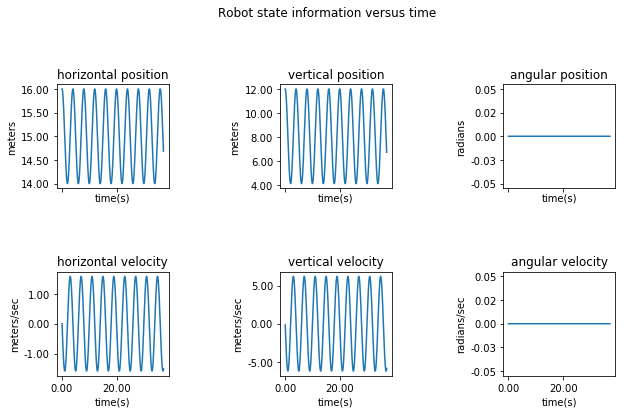

In [5]:
import tutorial; reload(tutorial); from tutorial import *
    

initial_pose = (16, 12,0.0)
desired_pose = (15, 12,0.0)



def closedLoopController (time, robot_state):
    
    # the output signal
    x,y,th, xdot, ydot, thdot = robot_state
    
    # the reference signal
    rx, ry, rth = desired_pose 
    
    u_x, u_y, u_th = (0,0,0)

    return u_x, u_y, u_th 

result = run_pd_control(initial_pose, closedLoopController)
plot(result, "Robot")

### PD Control Part 3:  Feedback control of the robot (continued)

**Activities:**

1. Try using different gains.  See if you can observe different system response behavior, such as:

    * under damped
    * damped
    * overdamped

2. Improve upon your controller by adding a derivative term.  In this case the reference signal for the derivative terms should be equal to 0. 

$$u = K_{pose}\cdot(X_{desired} - X_{current}) + K_{d}\cdot(\dot{X}_{desired} - \dot{X}_{current})$$

* $u$ is the output of our controller
* $K_{d}$ is the derivitave gain
* $\dot{X}_{desired}$ is the reference signal  (In our case it is equal to 0)


    `rxdot, rydot, rthdot = 0,0,0 `

In [ ]:
import tutorial; reload(tutorial); from tutorial import *
    

initial_pose = (16, 12,3.14/2)
desired_pose = (3, 16,0.0)
desired_vel = (0, 0, 0)



def closedLoopController (time, robot_state):
    
    # the output signal
    x,y,th, xdot, ydot, thdot = robot_state
    
    # the reference signal
    rx, ry, rth = desired_pose 
    rxdot, rydot, rthdot = desired_vel
    
    u_x, u_y, u_th = (0,0,0)
    
    return u_x, u_y, u_th 

result = run_pd_control(initial_pose, closedLoopController)
plot(result, "Robot")